### Code - Load dependencies

In [1]:
# general
import io

# data
import numpy as np
import pandas as pd

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

### Load the dataset

In [2]:
# @title
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [3]:
chicago_taxi_dataset.sample(5)

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
8977,05/17/2022 10:30:00 AM,05/17/2022 10:45:00 AM,10.50,766,2.46,11.6,NaN,NaN,8.0,28.0,12.71,2.92,23.0,0.0,0.0,15.63,Mobile,City Service
22,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,888,1.00,4.1,1.703108e+10,1.703184e+10,8.0,32.0,9.00,0.00,0.0,0.0,0.0,10.95,Cash,Taxicab Insurance Agency Llc
20635,05/17/2022 11:15:00 AM,05/17/2022 11:30:00 AM,11.25,1132,7.32,23.3,NaN,NaN,7.0,28.0,21.25,3.26,15.3,0.0,0.0,24.51,Prcard,Flash Cab
17530,05/16/2022 9:15:00 PM,05/16/2022 9:30:00 PM,21.25,720,3.90,19.5,1.703106e+10,1.703108e+10,6.0,8.0,13.00,4.30,30.7,0.0,1.0,18.30,Credit Card,Choice Taxi Association
29745,05/16/2022 10:00:00 AM,05/16/2022 10:15:00 AM,10.00,880,9.85,40.3,NaN,NaN,76.0,NaN,26.25,9.85,20.2,0.0,22.5,59.10,Credit Card,Sun Taxi


In [4]:
chicago_taxi_dataset.shape

(31694, 18)

In [5]:
chicago_taxi_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  object 
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  int64  
 4   TRIP_MILES              31694 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

In [17]:
chicago_taxi_dataset.isnull().sum() / chicago_taxi_dataset.shape[0]*100

TRIP_START_TIMESTAMP       0.000000
TRIP_END_TIMESTAMP         0.000000
TRIP_START_HOUR            0.000000
TRIP_SECONDS               0.000000
TRIP_MILES                 0.000000
TRIP_SPEED                 0.000000
PICKUP_CENSUS_TRACT       58.165583
DROPOFF_CENSUS_TRACT      55.755032
PICKUP_COMMUNITY_AREA     10.150186
DROPOFF_COMMUNITY_AREA    11.027324
FARE                       0.000000
TIPS                       0.000000
TIP_RATE                   0.000000
TOLLS                      0.000000
EXTRAS                     0.000000
TRIP_TOTAL                 0.000000
PAYMENT_TYPE               0.000000
COMPANY                    0.000000
dtype: float64

In [18]:
# Updates dataframe to use specific columns.
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


## Dataset Exploration

### View dataset statistics

In [19]:
training_df.describe(include='all')

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


### Generate a correlation matrix

In [20]:
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


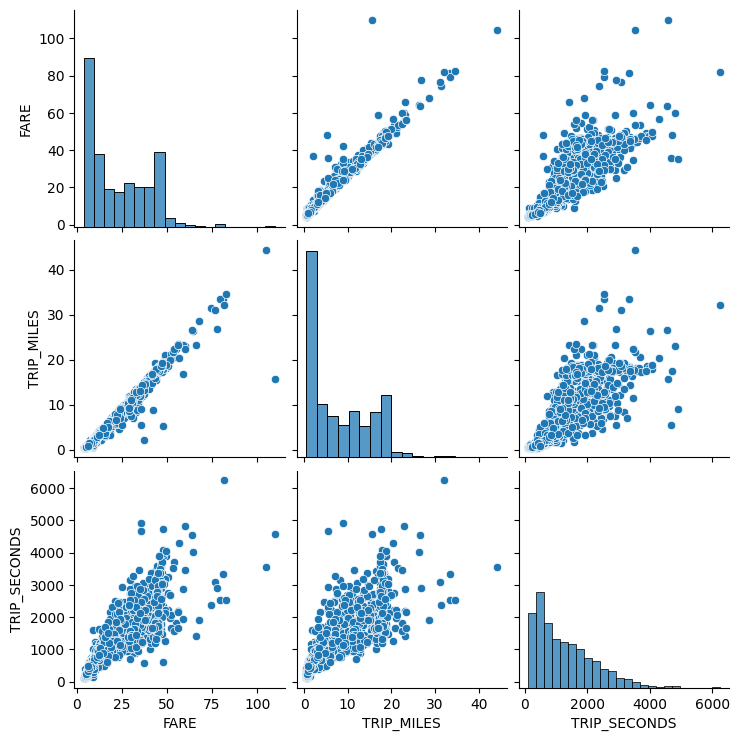

In [22]:
sns.pairplot(training_df.sample(1000), x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])